# [Контест](https://contest.yandex.ru/contest/29403/enter/)    
# Домашнее задание #8 "Деревья"

# A. Бинарное дерево (вставка, поиск, обход)

Напишите программу, которая будет реализовывать действия в бинарном дереве поиска «вставить» и «найти» (по значению). Программа должна обрабатывать запросы трёх видов:

ADD n — если указанного числа еще нет в дереве, вставлять его и выводить слово «DONE», если уже есть — оставлять дерево как было и выводить слово «ALREADY».

SEARCH — следует выводить слово «YES» (если значение найдено в дереве) или слово «NO» (если не найдено). Дерево при этом не меняется.

PRINTTREE — выводить все дерево, обязательно используя алгоритм, указанный в формате вывода результатов.

### Решение на функциях

In [68]:
binary_tree = [None, [None], [None]]


def find_struct(tree, x):
    root = tree[0]
    if root == x:
        return 'YES'
    if root == None:
        return 'NO'
    if root < x:
        right = tree[2]
        if right[0] == None:
            return 'NO'
        else:
            return find_struct(right, x)
    if root > x:
        left = tree[1]
        if left[0] == None:
            return 'NO'
        else:
            return find_struct(left, x)


def add_struct(tree, x):
    root = tree[0]
    if root == None:
        tree[0] = x
        return 'DONE'
    if root == x:
        return 'ALREADY'
    if root < x:
        right = tree[2]
        if right[0] == None:
            tree[2] = [x, [None], [None]]
            return 'DONE'
        else:
            return add_struct(right, x)
    if root > x:
        left = tree[1]
        if left[0] == None:
            tree[1] = [x, [None], [None]]
            return 'DONE'
        else:
            return add_struct(left, x)


def print_tree(tree, prefix):
    'Центрированный (In-Order) обход'
    if tree[0]:
        prefix.append('.')
        print_tree(tree[1], prefix)
        print(''.join(prefix[1:]+[str(tree[0])]))
        print_tree(tree[2], prefix)
        prefix.remove('.')


with open('input.txt', 'r') as f:
    while True:
        query = f.readline().split()
        if not query:
            break
        if query[0] == 'ADD':
            ans = add_struct(binary_tree, int(query[1]))
            print(ans)
        if query[0] == 'SEARCH':
            ans = find_struct(binary_tree, int(query[1]))
            print(ans)
        if query[0] == 'PRINTTREE':
            print_tree(binary_tree, [])

DONE
DONE
399604
.911137
DONE
DONE
DONE
NO
DONE
YES
YES
YES
399604
....441212
...468712
....701860
..823319
.911137


### Решение с использованием класса

In [132]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
class Tree:
    def __init__(self):
        self.root = None
        
    def add_node(self, x):
        if self.root is None:
            self.root = Node(x)
            print('DONE')
        else:
            self._add(x, self.root)
        
    def _add(self, val, node):
        if val == node.value:
            print('ALREADY')
            return 1
        
        if val < node.value:
            if node.left is not None:
                self._add(val, node.left)
            else:
                node.left = Node(val)
                print('DONE')
        else:
            if node.right is not None:
                self._add(val, node.right)
            else:
                node.right = Node(val)
                print('DONE')
    
    def lookup(self, node, target):
        if node == None:
            print('NO')
        else:
            if target == node.value: 
                print('YES')
            else:
                if target < node.value: 
                    return self.lookup(node.left, target)
                else: 
                    return self.lookup(node.right, target)
    
def print_tree(node, prefix):
    'Центрированный (In-Order) обход'
    if node is not None:
        prefix.append('.')
        print_tree(node.left, prefix)
        print(''.join(prefix[1:]+[str(node.value)]))
        print_tree(node.right, prefix)
        prefix.remove('.')

tree = Tree()

with open('input.txt', 'r') as f:
    while True:
        query = f.readline().split()
        if not query:
            break
        if query[0] == 'ADD':
            tree.add_node(int(query[1]))
        if query[0] == 'SEARCH':
            tree.lookup(tree.root, int(query[1]))
        if query[0] == 'PRINTTREE':
            print_tree(tree.root, [])

DONE
DONE
399604
.911137
DONE
DONE
DONE
NO
DONE
YES
YES
YES
399604
....441212
...468712
....701860
..823319
.911137


In [127]:
tree.root.left

# B. Родословная: предки и потомки

В генеалогическом древе у каждого человека, кроме родоначальника, есть ровно один родитель.

Каждом элементу дерева сопоставляется целое неотрицательное число, называемое высотой. У родоначальника высота равна 0, у любого другого элемента высота на 1 больше, чем у его родителя.

Даны два элемента в дереве. Определите, является ли один из них потомком другого.

In [146]:
# Создаю словарь key: Потомок, value: Его предок
# Поиск родства проверяю по этому словарю
def kinship(person_1, person_2):
    'Проверка, является ли person_2 каким-то из предков person_1'
    while person_1 in child_par: # Пробегаюсь по всем последовательным предкам человека, сравнивая их со вторым человеком
        parent = child_par[person_1]
        if parent == person_2: # Совпадение найдено
            return 1
        person_1 = parent
    # Если не произошло совпадения среди предков person_1 с person_2
    return 0
child_par = {}
with open('input.txt', 'r') as f:
    N = int(f.readline())
    for _ in range(N-1):
        child, parent = f.readline().split()
        child_par[child] = parent
        
    answer = []
    query = f.readline().split()
    
    while query:
        person_1, person_2 = query
        if kinship(person_1, person_2):
            answer.append('2')
        elif kinship(person_2, person_1):
            answer.append('1')
        else:
            answer.append('0')
        query = f.readline().split()
print(' '.join(answer))

1 2 0


In [147]:
child_par

{'Alexei': 'Peter_I',
 'Anna': 'Peter_I',
 'Elizabeth': 'Peter_I',
 'Peter_II': 'Alexei',
 'Peter_III': 'Anna',
 'Paul_I': 'Peter_III',
 'Alexander_I': 'Paul_I',
 'Nicholaus_I': 'Paul_I'}

# C. Родословная: LCA

В генеалогическом древе определите для двух элементов их наименьшего общего предка. Наименьшим общим предком элементов A и B является такой элемент C, что С является предком A, C является предком B, при этом глубина C является наибольшей из возможных. При этом элемент считается своим собственным предком.

In [154]:
# Создаю словарь key: Потомок, value: Его предок
child_par = {}

# Тк у каждого человека точно имеется общий предок по условию задачи, а родителем может быть только 1 человек,
# то началом отсчёта глубины у людей в генеалогическом древе является один и тот же человек.

# Ход решения
# 1. Найдём глубину каждого человека в генеалогическом древе
# 2. Поднимем более глубокого человека до уровня менее глубокого в дереве человека
# 3. Когда их глубина совпадает будем делать сравнения, совпадают ли найденные люди на этом уровне. 
# 4. Если не сопадают - одновременно поднимем уровень у обоих людей и сравним снова.

def depth(person):
    'Глубина person в генеалогическом древе'
    depth = 0
    while person in child_par: 
        depth += 1
        person = child_par[person]
    return depth

def common_ancestor(person_1, person_2):
    'поиск ближайщего предка людей person_1, person_2'
    depth_1 = depth(person_1)
    depth_2 = depth(person_2)
    # Поиск кто лежит ниже (person_max - человек лежищий глубже в древе)
    if depth_1 >= depth_2:
        depth_max, depth_min = depth_1, depth_2
        person_max, person_min = person_1, person_2
    else:
        depth_max, depth_min = depth_2, depth_1
        person_max, person_min = person_2, person_1
    
    #Подъем более глубокого до уровня менее глубокого
    while depth_max != depth_min:
        person_max = child_par[person_max]
        depth_max -= 1
        
    #Одновременный подъем до общего предка
    while person_max != person_min:
        person_max = child_par[person_max]
        person_min = child_par[person_min]
    return person_min

with open('input.txt', 'r') as f:
    N = int(f.readline())
    for _ in range(N-1):
        child, parent = f.readline().split()
        child_par[child] = parent
        
    answer = []
    query = f.readline().split()
    
    while query:
        person_1, person_2 = query
        print(common_ancestor(person_1, person_2))
        query = f.readline().split()

Paul_I
Peter_I
Anna


Проверить потом, можно ли решить эту задачу, положив всех предков человека в виде tuple (предок, индекс предка) в set. Затем взять разницу двух сэтов и найти значение с меньшим индексом.

# D. Бусинки

Маленький мальчик делает бусы. У него есть много пронумерованных бусинок. Каждая бусинка имеет уникальный номер – целое число в диапазоне от 1 до N. Он выкладывает все бусинки на полу и соединяет бусинки между собой произвольным образом так, что замкнутых фигур не образуется. Каждая из бусинок при этом оказывается соединенной с какой-либо другой бусинкой.

Требуется определить, какое максимальное количество последовательно соединенных бусинок присутствует в полученной фигуре.



In [217]:
# Задача на поиск наиболее длинного пути в графе. Поиск диаметра дерева.  Выполняется за 2 поиска в ширину(BFS).

# Ход решения:
# 1. Создадим дерево
# 2. Возьмем случайную вершину и найдём для неё наиболее удаленную вершину полным перебором. 
# Эта вершина будет одним краем диаметра
# 3. Возьмем найденную вершину и найдем для неё самую удаленную. 
# Расстояние между ними будет диаметром дерева и ответом на задачу.

# Дерево (не бинарное) будем строить в виде словаря, представляющего список смежности.

tree = {}
with open('input.txt', 'r') as f:
    N = int(f.readline())
    for _ in range(N-1):
        bead_1, bead_2 = map(int, f.readline().split())
        tree.setdefault(bead_1, []).append(bead_2)
        tree.setdefault(bead_2, []).append(bead_1)
        
    
def bfs(init):
    'Ищёт самую удаленную вершину и расстояние до неё'
    
    # Добавим к списку смежности расстояние до некоторой опорной вершины. 
    # Для начала инициализируем расстояния нулями
    tree_with_distance = {}
    for key in tree:
        tree_with_distance[key] = [tree[key],0]
    
    visited = set()
    queue = []
    
    queue.append(init)
    while queue:
        head = queue.pop(0)
        for neighbour in tree_with_distance[head][0]:
            if neighbour not in visited:
                queue.append(neighbour)
                tree_with_distance[neighbour][1] = tree_with_distance[head][1] + 1
        visited.add(head)
    
    max_distance = 0
    max_distance_key = list(tree_with_distance.keys())[0]
    for key in tree_with_distance.keys():
        distance = tree_with_distance[key][1]
        if distance > max_distance:
            max_distance = distance
            max_distance_key = key
    return max_distance, max_distance_key

if len(tree) > 1:
    _, max_distance_key = bfs(list(tree.keys())[0])
    max_distance, _ = bfs(max_distance_key)
else:
    max_distance = 0
number_of_beads = max_distance + 1    
print(number_of_beads)

10


In [221]:
tree

{1: [2, 6],
 2: [1, 3],
 3: [2, 4],
 4: [3, 5],
 5: [4],
 6: [1, 10],
 10: [6, 9],
 9: [10, 8],
 8: [9, 7],
 7: [8]}

# E. Дерево Хаффмана

Алгоритм Хаффмана позволяет кодировать символы алфавита беспрефиксным кодом различной длины, сопоставляя частым символам более короткий код, а редким - более длинный. Этот алгоритм используется во многих программах сжатия данных. Код символа определяется по следующим правилам:

1. Символы входного алфавита образуют список свободных узлов. Каждый лист имеет вес, который может быть равен либо вероятности, либо количеству вхождений символа в сжимаемое сообщение.

2. Выбираются два свободных узла дерева с наименьшими весами.

3. Создается их родитель с весом, равным их суммарному весу.

4. Родитель добавляется в список свободных узлов, а два его потомка удаляются из этого списка.

5. Правой дуге, выходящей из родителя, ставится в соответствие бит 1, левой - бит 0. Битовые значения ветвей, исходящих от корня, не зависят от весов потомков.

6. Шаги, начиная со второго, повторяются до тех пор, пока в списке свободных узлов не останется только один свободный узел. Он и будет считаться корнем дерева.

Пусть буквы "а" встречается в сообщении 4 раза, буква "б" - 3 раза, а буквы "в" и "г" - по 1 разу. Этим частотам может быть сопоставлено такое дерево:

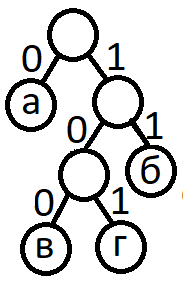

Двоичный код буквы - это все цифры на пути из корня дерева в лист, соответствующей этой букве.

Для эффективного сжатия также важно максимально экономно хранить дерево Хаффмана. Опишем обход в глубину этого дерева, при этом мы будем сначала полностью обходить левое поддерево, затем возвращаться в узел, а затем обходить правое поддерево. Каждый раз проходя по ребру будем записывать букву L, R или U в зависимости от того, куда мы шли по ребру (L - в левого ребенка, R- в правого ребенка, U - в родителя). Приведенному в примере дереву будет соответствовать строка:

LURLLURUURUU

Такая строка позволяет однозначно восстановить дерево и сопоставить двоичные коды всем листьям дерева. Однако, запись можно модифицировать, заменив ребра типа L и R на ребра типа D, которое означает, что мы спускаемся в ребенка (сначала в левого, а если левый посещен - в правого). Тогда запись для нашего дерева будет выглядеть так:

DUDDDUDUUDUU

По этой строке также однозначно возможно восстановить структуру дерева. Она использует алфавит только из двух символов вместо трёх и может быть закодирована меньшим числом бит.

Эту запись также можно модифицировать, заменив смысл команды U. Теперь U будет обозначать, что мы поднимаемся к предку текущей вершины до тех пор, пока мы правый ребёнок. Если при подъёме мы пришли в вершину из левого ребенка, то сразу перейдем в правого. Запись для нашего дерева будет выглядеть так:

DUDDUU

Вам необходимо по записи, построенной по таким правилам, определить коды для всех листьев в порядке их обхода.

In [275]:
# Сперва восстановим дерево, потом считаем из него коды листьев.
# P.S. Можно было обойтись без восстановления дерева, печатая сразу по входу.
N = int(input())

def make_tree(serialized):
    tree = {'left': None, 'right': None, 'up': None, 'type': 'root'}
    now_node = tree
    number_of_node = 0
    for command in serialized:
        if command == 'D':
            now_node['left'] = {'left': None, 'right': None, 'up': now_node, 'type':'left'}
            now_node = now_node['left']
        if command == 'U':
            while now_node['type'] == 'right':
                now_node = now_node['up']
            now_node = now_node['up']
            now_node['right'] = {'left': None, 'right': None, 'up': now_node, 'type':'right'}
            now_node = now_node['right']
    return tree

def traverse(tree, prefix):
    'Считывание кодов листьев'
    if tree['right'] == None and tree['left'] == None:
        #print(''.join(prefix))
        return [''.join(prefix)]
    prefix.append('0')
    answer = traverse(tree['left'], prefix)
    prefix.pop()
    
    prefix.append('1')
    answer.extend(traverse(tree['right'], prefix))
    prefix.pop()

    return answer
    
for _ in range(N):
    serialized = input()
    tree = make_tree(serialized)
    answer = traverse(tree, [])
    print(len(answer))
    print('\n'.join(answer))

3
DDUUDU
4
00
01
10
11
DUDUDUDDUDUU
7
0
10
110
11100
111010
111011
1111
DDDDUDDUUUUU
7
0000
000100
000101
00011
001
01
1


In [282]:
# Сразу печатаем при построении дерева
N = int(input())

def make_tree(serialized):
    prefix = []
    tree = {'left': None, 'right': None, 'up': None, 'type': 'root'}
    now_node = tree
    number_of_node = 0
    for command in serialized:
        if command == 'D':
            now_node['left'] = {'left': None, 'right': None, 'up': now_node, 'type':'left'}
            now_node = now_node['left']
            prefix.append('0')
        if command == 'U':
            print(''.join(prefix))
            while now_node['type'] == 'right':
                now_node = now_node['up']
                prefix.pop()
            now_node = now_node['up']
            prefix.pop()
            now_node['right'] = {'left': None, 'right': None, 'up': now_node, 'type':'right'}
            now_node = now_node['right']
            prefix.append('1')
    print(''.join(prefix))
    return tree

    
for _ in range(N):
    serialized = input()
    print(len(serialized)//2 + 1)
    tree = make_tree(serialized)

3
DDUUDU
4
00
01
10
11
DUDUDUDDUDUU
7
0
10
110
11100
111010
111011
1111
DDDDUDDUUUUU
7
0000
000100
000101
00011
001
01
1
